<a href="https://colab.research.google.com/github/Caavlier/Project-RealState/blob/main/Real_Estate_Clean_Up_Project_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Disclaimer: Ideally, create a repo on your github as your first project, download the files, this notebook and the single csv there or fork it.***

# **Real Estate Clean up**

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from Fotocasa which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

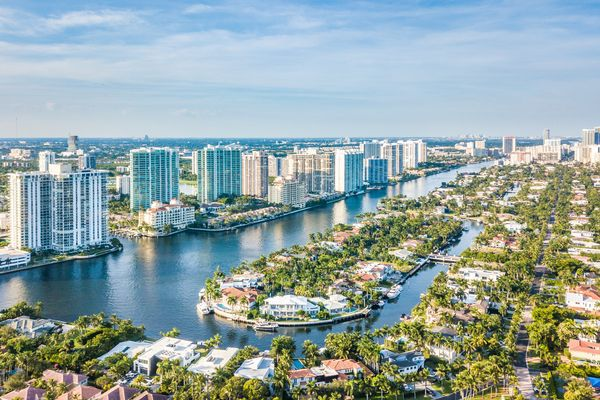

## **Preamble**



In [46]:
# Library for data manipulation, plotting and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# URL of the CSV file hosted on GitHub (raw content)
url = 'https://raw.githubusercontent.com/Caavlier/Proyect-RealState/refs/heads/main/real_estate.csv'

# Load the CSV file into a DataFrame (file uses semicolons < ; > as the delimiter instead of commas)
df = pd.read_csv(url, sep=';')

> **Understanding the Data:**

In [ ]:
# Display the first n rows of the DataFrame
df.head(n=10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,...,0,0,0,0,0,0,"40,53391","-3,89445",NaN,NaN
6,7,153848236,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,145.0,430000,...,0,0,0,0,0,0,"40,5105842135624","-3,89436578643763",NaN,NaN
7,8,153482331,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,95.0,275000,...,0,0,0,0,0,0,"40,53294","-3,89898",NaN,NaN
8,9,153885351,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,277.0,445000,...,0,0,0,0,0,0,"40,5363057864376","-3,89294421356237",NaN,NaN
9,10,153215459,False,modesta,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,129.0,350000,...,0,0,0,0,0,0,"40,37502","-3,74391",NaN,NaN


In [ ]:
# Check the columns in the DataFrame to understand the data
print(f"\nThe {df.shape[1]}-columns of the DataFrame are: \n{df.columns}")
print(f"\nThis is what we can find in an arbitrary row: \n{df.iloc[5]}") # row 6

# All rows have at least a NaN
print(f"\nOBSERVATION: If we remove all the rows with missing values, the resulting DataFrame  is: \n{df.dropna()}")


The 37-columns of the DataFrame are: 
Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

This is what we can find in an arbitrary row: 
Unnamed: 0                                                          6
id_realEstates                                              153934794
isNew                                                           False
realEstate_name                                               expimad
phone_realEstate                                          912780412.0
url_inmueble        https://www.fotocasa.es

## **Data extraction**

**Exercise 01.** Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [ ]:
# Work with 'price' to choose the most expensive house
# 'Unnamed: 0': ennumerate the DataFram starting at 1
Max = df['price'].idxmax() # Returns an index starting at 0,...

print(f"The {df.loc[Max,'Unnamed: 0']}-house with address {df.loc[Max,'address']} is the most expensive and its price is {df.loc[Max,'price']} USD")
df.iloc[Max]

The 13111-house with address El Escorial is the most expensive and its price is 8500000 USD


,13110
Unnamed: 0,13111
id_realEstates,132042636
isNew,False
realEstate_name,engel volkers torrelodones
phone_realEstate,911798512.0
url_inmueble,https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms,19.0
bathrooms,NaN
surface,NaN
price,8500000


**Exercise 02.** Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
# Work with 'price' to choose the cheapest house
Min = df['price'].idxmin()
print(f"The {df.loc[Min,'Unnamed: 0']}-house with address {df.loc[Min,'address']} is the cheapest and its price is {df.loc[Min,'price']} USD")

The 367-house with address Parla is the cheapest and its price is 0 USD


**Exercise 03.** Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

```The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters```

```The smallest house is located on County Road 1 N and its surface is 200 meters```

In [ ]:
# Work with 'surface' to find the biggest house (area)
Max = df['surface'].idxmax()
Min = df['surface'].idxmin()

print(f"The {df.loc[Min,'Unnamed: 0']}-house with address {df.loc[Min,'address']} is the smallest and its surface is {df.loc[Min,'surface']} USD")
print(f"The {df.loc[Max,'Unnamed: 0']}-house with address {df.loc[Max,'address']} is the biggest and its surface is {df.loc[Max,'surface']} USD")

The 499-house with address Calle Amparo,  Madrid Capital is the smallest and its surface is 15.0 USD
The 6795-house with address Sevilla la Nueva is the biggest and its surface is 249000.0 USD


**Exercise 04.** How many distinct populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

> print(populations)

`population1, population2, population3, ...`

In [ ]:
# Missing values in level5
p = df['level5'].nunique() # Count number of non-NaN elements in level5
Np = df['level5'].nunique(dropna=False) - p # Number of NaN elements
print(f"The dataset contains {p} distinct populations with {Np} missing values.")

populations = df['level5'].unique() # Array with only different elements in the series. Ej [2,2,1] --> [2,1]
print("\nThe names of the populations are:")
print(', '.join(populations)) # It joins all the array's elements into a single string

The dataset contains 168 distinct populations with 0 missing values.

The names of the populations are:
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Medi

**Exercise 05.** Does the dataset contain NAs? (★☆☆)

Print a boolean value (True or False) followed by the rows/cols that contains NAs.

In [ ]:
# NOTE: All rows have missing values. Therefore, print "rows x boolean" will be redundant

dfB = df.isna() # Boolean-DataFrame with respect to NaN
dfB.any() # Returns the index of the columns with NaN values

# OBSERVATION: 'df.any()' indicates columns with at least one non-NaN

,0
Unnamed: 0,False
id_realEstates,False
isNew,False
realEstate_name,True
phone_realEstate,True
url_inmueble,False
rooms,True
bathrooms,True
surface,True
price,False


**Exercise 06.** Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [ ]:
# DataFrame without NaNs
nonNAN = df.dropna(axis=1)

print(f"Original dataset dimensions = {df.shape}")
print(f"Dataset without NaNs dimensions = {nonNAN.shape}")
nonNAN['level5'].isna()

Original dataset dimensions = (15335, 37)
Dataset without NaNs dimensions = (15335, 25)


,level5
0,False
1,False
2,False
3,False
4,False
...,...
15330,False
15331,False
15332,False
15333,False


**Exercise 07.** Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [ ]:
# DataFrame with a given condition
df_Arroy = df.loc[df['level5'] == "Arroyomolinos (Madrid)"]
mean = df_Arroy['price'].mean() # This is a number

print(f"Mean of prices in 'Arroyomolinos (Madrid)' is ${mean}" )

Mean of prices in 'Arroyomolinos (Madrid)' is $294541.59854014596


**Exercise 08.** Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

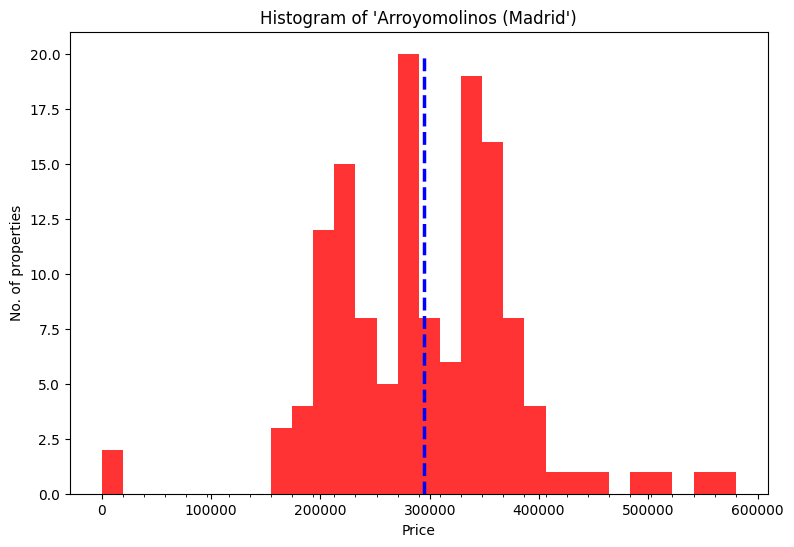

In [ ]:
# DataFrame with given condition "Arroymolinos" and a single column specified
df_Arroy = df.loc[df['level5'] == "Arroyomolinos (Madrid)", ['price']]

# Plotting
plt.figure(figsize=(9,6))
counts, bins, patches = plt.hist(df_Arroy['price'], bins=30, color='red', alpha=0.8) # 'counts' is the count in each bin, 'bins' is the lower-limit of each bin
plt.title("Histogram of 'Arroyomolinos (Madrid')")
plt.xlabel("Price")
plt.ylabel("No. of properties")

# Ticks showing bins used
axes = plt.gca()
axes.xaxis.set_minor_locator(ticker.FixedLocator(bins))

# Vertical dashed line in the mean value
plt.plot([mean,mean],[0,20], '--b', linewidth=2.5)

plt.show()

> **Histogram analysis:**
What we can see at first sight is how properties cluster around the mean price (blue dashed line) in Arroymolinos (Madrid). This suggests that this population follows a *normal distribution*.

In [ ]:
# Which 'bin' contains the mean value?
a = bins < mean
print(a)
for i in range(len(a)):
  if a[i] == True: # indices where bins are minor than mean
    print(i)
print(f"mean value is between bins: [{a[15]},{a[16]}]")
print(counts[14]) # Has the maximum count of all bins (one bin before mean)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
mean value is between bins: [True,False]
20.0


**Exercise 09.** Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [47]:
# Sub-datasets for populations of interest
df_Val = df.loc[df['level5'] == "Valdemorillo"]
mean_Val = df_Val['price'].mean()

df_Gal = df.loc[df['level5'] == "Galapagar"]
mean_Gal = df_Gal['price'].mean()

# Comparition
print(f"The average price in population 'Valdemorillo' is ${mean_Val}")
print(f"The average price in population 'Galapagar' is ${mean_Gal}")

if mean_Val > mean_Gal:
  print("\nThe average price of properties in 'Valdemorillo' is higher than the average price of 'Galapagar'.")
else:
  print("\nThe average price of properties in 'Galapagar' is higher than the average price of 'Valdemorillo'.")

print(f"\nOBSERVATION: There are {df_Val['price'].count()} houses in 'Valdemorillo' population and {df_Gal['price'].count()} houses in 'Galapagar'.")
print("Houses in 'Valdemorillo' are more valuable?")

The average price in population 'Valdemorillo' is $363860.2931034483
The average price in population 'Galapagar' is $360063.20238095237

The average price of properties in 'Valdemorillo' is higher than the average price of 'Galapagar'.

OBSERVATION: There are 58 houses in 'Valdemorillo' population and 84 houses in 'Galapagar'.
Houses in 'Valdemorillo' are more valuable?


**Exercise 10.** Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called pps (price per square meter) and then analyze the values.

In [59]:
# Adding a column (price/m2) to a DataFrame
V = df_Val[['surface', 'price']].assign(price_per_m2 = df_Val['price'] / df_Val['surface'])
G = df_Gal[['surface', 'price']].assign(price_per_m2 = df_Gal['price'] / df_Gal['surface'])

# Mean of price/m2
V_mean = V['price_per_m2'].mean()
G_mean = G['price_per_m2'].mean()

# Conclusion
print(f"The average price per square meter in population 'Valdemorillo' is ${V_mean}")
print(f"The average price per square meter in population 'Galapagar' is ${G_mean}")

if V_mean > G_mean:
  print(f"\nThe average price per square meter in 'Valdemorillo' is ${V_mean - G_mean} higher than 'Galapagar'.")
else:
  print(f"\nThe average price per square meter in 'Galapagar' is ${G_mean - V_mean} higher than 'Valdemorillo'.")

The average price per square meter in population 'Valdemorillo' is $1317.9502109024986
The average price per square meter in population 'Galapagar' is $1606.3240303094024

The average price per square meter in 'Galapagar' is $288.37381940690375 higher than 'Valdemorillo'.


> **OBSERVATION:** Despite the fact that the average price per square meter in 'Galapagar' is higher than 'Valdemorillo', and 'Galapagar' also has more entries (properties); the average price in 'Valdemorillo' remains higher than 'Galapagar'. This may be due to properties in 'Valdemorillo' having larger surface areas.

In [49]:
# Do 'Valdemorillo' and 'Galapagar' have any NaN values?
print("Columns with NaN values:\n")
print(f"Galapagar: \n{G.isna().any()}")
print(f"\nValdemorillo: \n{V.isna().any()}")

# Number of non-NaN values per column
print("\nNumber of values per column:\n")
print(f"Galapagar: \n{G.count()}")
print(f"\nValdemorillo: \n{V.count()}")

# Average surface
print(f"\nGalapagar average surface: {G['surface'].mean()} m2")
print(f"Valdemorillo average surface: {V['surface'].mean()} m2")

Columns with NaN values:

Galapagar: 
surface          True
price           False
price_per_m2     True
dtype: bool

Valdemorillo: 
surface          True
price           False
price_per_m2     True
dtype: bool

Number of values per column:

Galapagar: 
surface         75
price           84
price_per_m2    75
dtype: int64

Valdemorillo: 
surface         53
price           58
price_per_m2    53
dtype: int64

Galapagar average surface: 305.52 m2
Valdemorillo average surface: 350.0188679245283 m2


**Exercise 11.** Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a scatter plot, then write a conclusion about it.

In [50]:
# Check columns in Valdemorillo having the same size
if len(V['surface'].isna()) - len(V['price'].isna()) == 0:
  print(f"Population 'Valmorillo' has the SAME number of entries in 'surface' and 'price'.")

# Finding the NaN-entries in 'surface'
print("\nThe missing entries in 'Valdemorillo' are:")
print(V.index[V['surface'].isna() == True])

# Replacing missing values by zero
aux = V.copy() # REMEMBER ------> ALWAYS DO A COPY
aux['surface'] = aux['surface'].fillna(0)

Population 'Valmorillo' has the SAME number of entries in 'surface' and 'price'.

The missing entries in 'Valdemorillo' are:
Index([13124, 13737, 13754, 13764, 14911], dtype='int64')


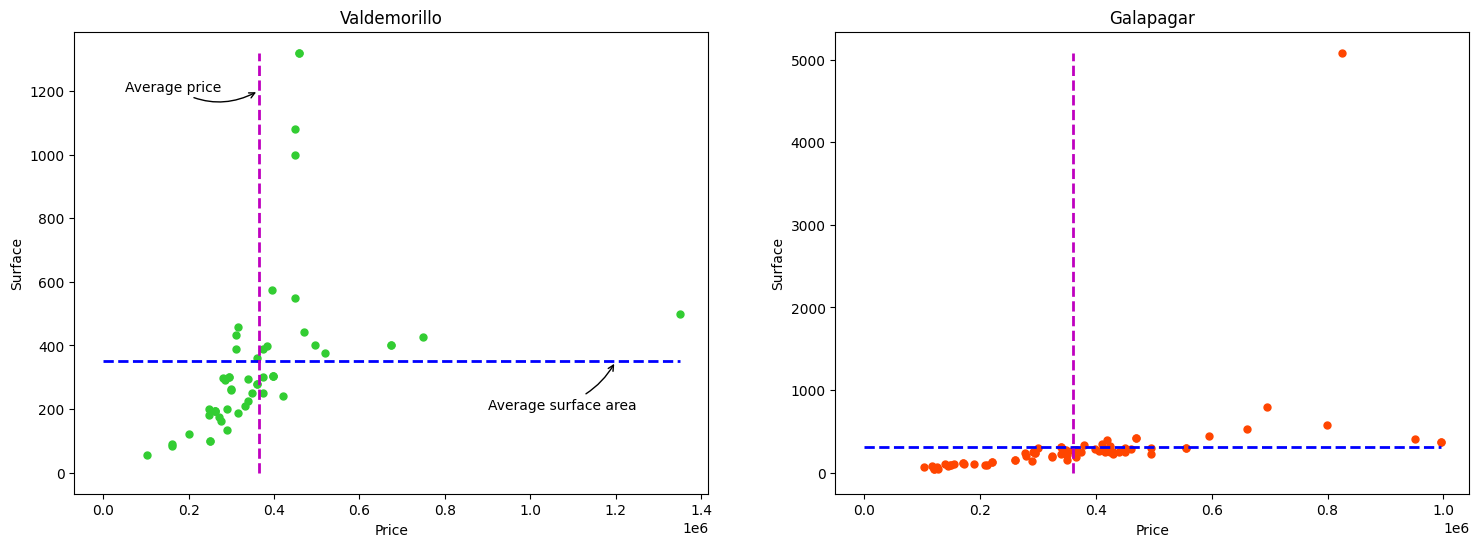

In [52]:
# Scatter plot 'price' vs. 'surface'
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Valdemorillo
axs[0].scatter(V['price'], V['surface'], s=25, c='limegreen')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Surface')
axs[0].set_title('Valdemorillo')

# Valdemorillo means
axs[0].plot([0,V['price'].max()],[V['surface'].mean(),V['surface'].mean()], '--b', linewidth=2)
axs[0].plot([V['price'].mean(),V['price'].mean()],[0,V['surface'].max()], '--m', linewidth=2)
axs[0].annotate("Average price", xy=(V['price'].mean(),1200), xytext=(50000,1200), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))
axs[0].annotate("Average surface area", xy=(1200000,V['surface'].mean()), xytext=(900000,200), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))
#axs[0].plot([0,G['price'].max()],[G['surface'].mean(),G['surface'].mean()], '--r', linewidth=2) # Galapagar mean
#axs[0].plot([G['price'].mean(),G['price'].mean()],[0,G['surface'].max()], '--c', linewidth=2)   # Galapagar mean



# Galapagar
axs[1].scatter(G['price'], G['surface'], s=25, c='orangered')
axs[1].set_xlabel("Price")
axs[1].set_ylabel("Surface")
axs[1].set_title("Galapagar")

# Galapagar means
axs[1].plot([0,G['price'].max()],[G['surface'].mean(),G['surface'].mean()], '--b', linewidth=2)
axs[1].plot([G['price'].mean(),G['price'].mean()],[0,G['surface'].max()], '--m', linewidth=2)

plt.show()

> **CONCLUSION:** We can now see that 'Valdemorillo' has more properties with above-average surface and price. Therefore, properties in 'Valdemorillo' are more valuable.

* It is also worth noting that 'Valdemorillo' has properties with above-average surface area but at lower price (THE BEST - 2nd quadrant, counterclockwise), in contrast to 'Galapagar', which does not.
* Additionally, the largest house in 'Valdemorillo' has an acceptable price (not much higher than the average).
* 'Galapagar' has a bunch of properties in the WORST quadrant (4th, counterclockwise): below average surface area and more expensive.

> Finally, 'Valdemorillo' appears to be a better choice for purchasing a house.

In [65]:
# The best house in 'Valdemorillo'
best = V['surface'].idxmax()
print(f"The {df.iloc[best]['Unnamed: 0']}-property at {df.iloc[best]['address']} is the largest in 'Valdemorillo' ({df.iloc[best]['surface']} m2) and it's priced at just ${df.iloc[best]['price'] - V['price'].mean()} above the population average price of ${V['price'].mean()}.")


The 6963-property at Calle Amapolas, 19, Valdemorillo is the largest in 'Valdemorillo' (1320.0 m2) and it's priced at just $95139.70689655171 above the population average price of $363860.2931034483.


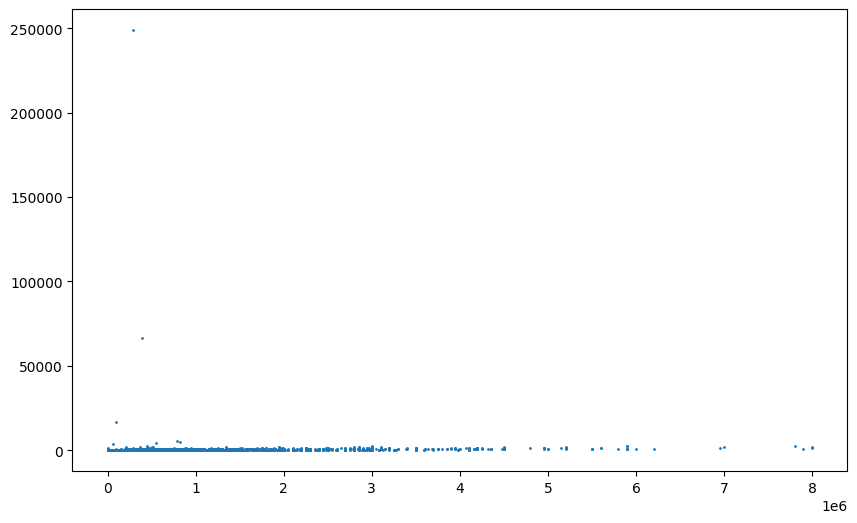

In [ ]:
# All populations scatter-plot
plt.figure(figsize=(10,6))
plt.scatter(df['price'],df['surface'], s=1)

**Exercise 12.** How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

**Exercise 13.** Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

**Exercise 14.** Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column level5 and the function isin.

**Exercise 15.** Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

**Exercise 16.** Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

**Exercise 17.** What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

**Exercise 18.** Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in a brief analysis about the plot.

Hint: You can help yourself by reviewing the multihist demo of Matplotlib. If you need more help, consult our lesson about [Matplotlib.ipynb](https://github.com/S4qk/Btp-Data-Science/blob/main/Matplotlib.ipynb)  or [Official doc](https://matplotlib.org/stable/users/index.html).

Brief *analysis* here

**Exercise 19.** What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called pps (price per square meter) and then analyze the values.

**Exercise 20.** Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)

Hint: Make a scatter plot of each population using subplots.

**Exercise 21.** Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map (Here we use another library but it follows similar properties of previous libs, consult [general doc](https://ipyleaflet.readthedocs.io/en/latest/) or [maps & basemaps](https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/index.html) for a full or deep understanding).

In [ ]:
# Import the necessary classes from the ipyleaflet library
from ipyleaflet import Map, basemaps

# Create an interactive map centered on the southwest area of Madrid
# center = (latitude, longitude)
# zoom = 11.5: initial zoom level
# min_zoom and max_zoom: limits for zooming in/out
# basemap: OpenStreetMap tile provider (standard street map style)
map = Map(
    center=(40.35, -3.8),
    zoom=11.5,
    min_zoom=1,
    max_zoom=20,
    basemap=basemaps.OpenStreetMap.Mapnik
)

# Display the map
map


In [ ]:
# HERE: plot the coordinates of the estates

# PUT HERE YOUR CODE: